In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('./data/kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [19]:
#a)
X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 

#Your code:
model.fit(X, y)
#Hint: .fit()

LinearRegression(n_jobs=1)

R^2 equals: 0.49670880166311393
Mean squared error equals: 57947526161.288376
Intercept equals: -32304.654721028113
Coefficients equals: [269.46205468]


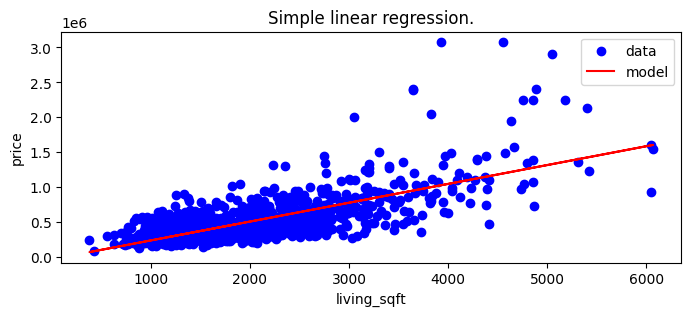

In [20]:
#b)

#Your code:
y_pred= model.predict(X)

r_squared=model.score(X,y)
mse= mean_squared_error(y, y_pred)

print(f"R^2 equals: {r_squared}")
print(f"Mean squared error equals: {mse}")
print(f"Intercept equals: {model.intercept_}")
print(f"Coefficients equals: {model.coef_}")

plt.figure(figsize=(8, 3))
plt.scatter(X, y, color='blue', label='data')
plt.plot(X, y_pred, color='red', label='model')
plt.xlabel('living_sqft')
plt.ylabel('price')
plt.title('Simple linear regression.')
plt.legend()
plt.show()


#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

Based on the results of the linear regression model, we can make several observations about the relationship between the **living sqft** and the **price of the house**.
## 1. $ R^2 $ Score (0.4967) 
- The $ R^2 $ score, also known as the coefficient of determination, is approximately *0.497*. This metric indicates that about *49.7%* of the variance in **price** can be explained by the variance in **sqft_living**.
- A score of *0.497* is moderate and suggests that while there is some linear relationship between the size of the living area and the house price, there is likely a significant portion of the variance in price that remains unexplained by this single predictor alone. Other factors might also play a crucial role in determining house prices, such as location, condition, and number of rooms, which are not captured in this model. 
## 2. Mean Squared Error (57,947,526,161.288376)
- MSE represents the average of the squared differences between the actual values and the predicted values.
- In this context, the large MSE value suggests that the model’s predictions can deviate quite significantly from the actual prices. Given that prices are often in the range of hundreds of thousands to millions, this high error indicates that predictions may not be particularly accurate. Thus, this simple linear model may not capture enough detail to be reliably used for predicting prices on an individual basis.
## 3. Intercept (-32,304.65)
- This represents the predicted price of a house when the sqft_living is zero.
- Though a negative intercept isn’t realistic in the context of house prices, it is not uncommon in linear regression models, particularly when the range of data doesn’t include zero values. Here, it indicates that the linear model extrapolates a non-realistic negative value outside the range of the training data and reinforces the idea that this model should not be used for predictions outside the data’s range.
## 4. Coefficient (269.46)
- This indicates that, on average, for every additional square foot of living area, the price increases by about $269.46.
- This coefficient shows that there is indeed a positive relationship between the living area and price, meaning that, as expected, larger homes tend to have higher prices. However, the model implies a consistent rate of increase, which may oversimplify real-world pricing, where larger homes might see diminishing returns per square foot or other nonlinear effects.


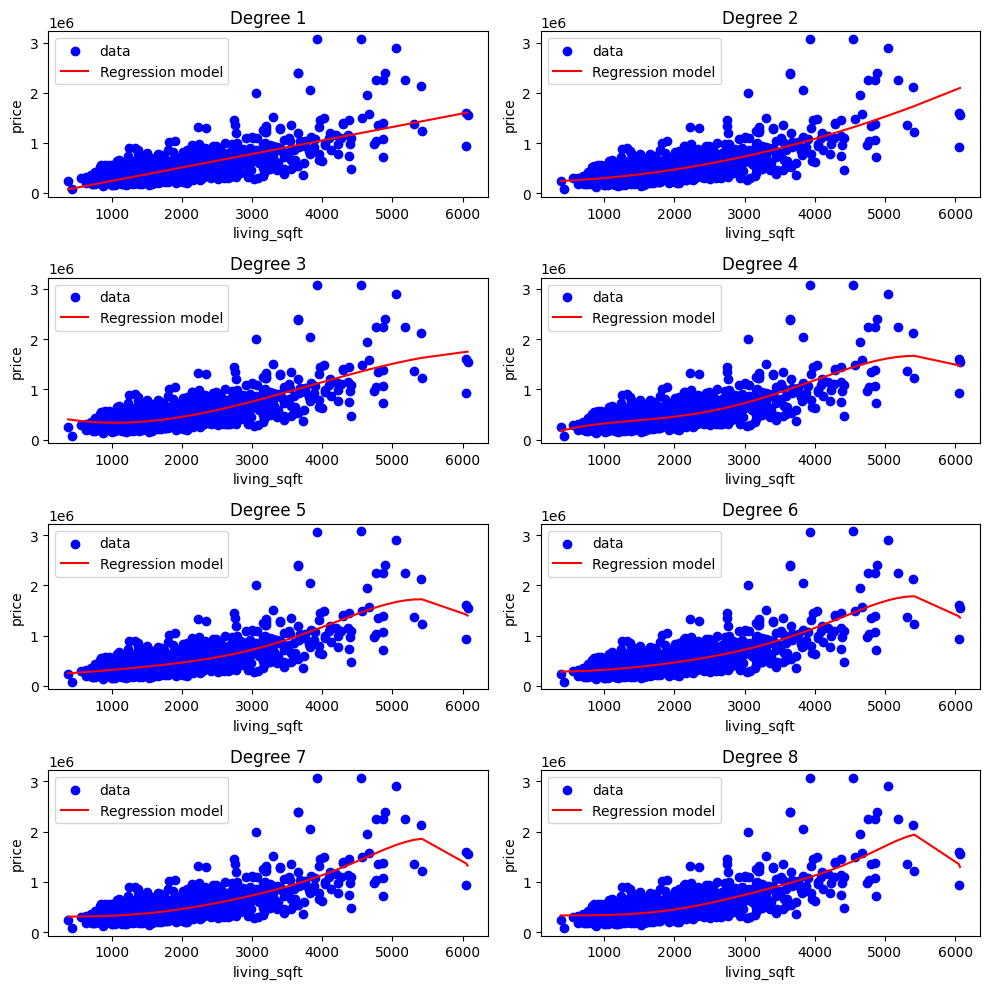

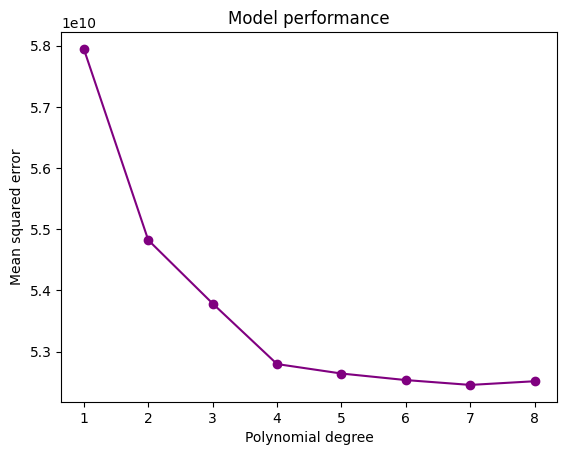

In [35]:
#c)

mse_values = []

fig, axs = plt.subplots(4, 2, figsize=(10, 10))
axs = axs.ravel() #making it one dimensional array for easier indexing

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    poly_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1) 
    poly_model.fit(X_order, y)
    
    y_poly_pred = poly_model.predict(X_order)
    
    mse = mean_squared_error(y_poly_pred, y)
    mse_values.append(mse)
    
    sorted_indices = np.argsort(X.flatten())
    X_sorted = X[sorted_indices]
    y_poly_pred_sorted = y_poly_pred[sorted_indices]
    
    axs[order-1].scatter(X, y, color='blue', label='data')
    axs[order-1].plot(X_sorted, y_poly_pred_sorted, color='red', label='Regression model')
    axs[order-1].set_xlabel('living_sqft')
    axs[order-1].set_ylabel('price')
    axs[order-1].set_title(f'Degree {order}')   
    axs[order-1].legend()
    
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(range(1,9), mse_values, marker='o', color='purple')
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")
plt.title("Model performance")
plt.show()


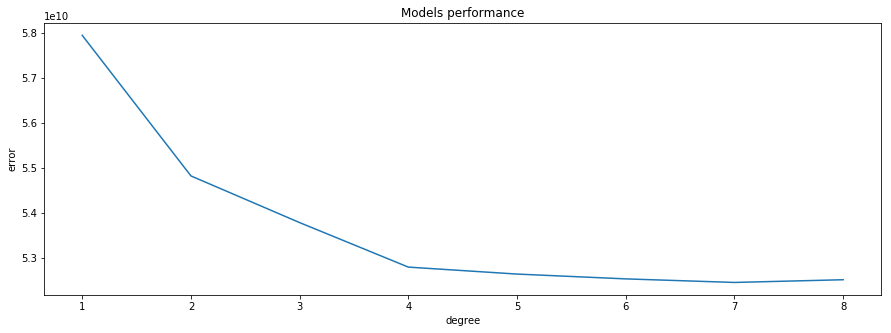

In [5]:
#Your code:


## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

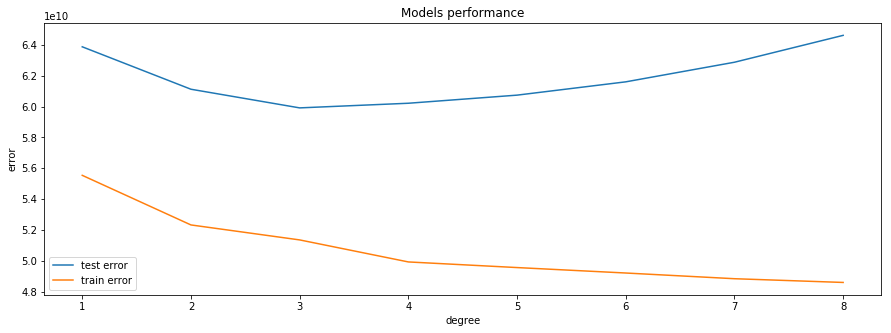

In [6]:
#a)

for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    ...

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

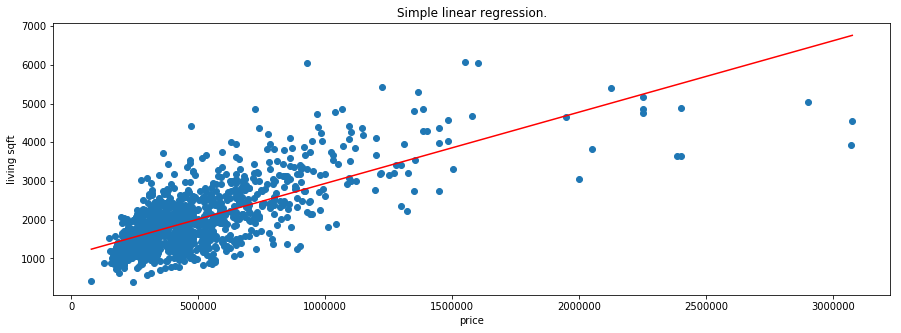

Mean squared error equals: 396407.1889615158


In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:


In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:


Mean squared error equals: 48749900202.864044
